In [1]:
using BenchmarkTools
using Plotly

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-622758088937603560\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-18432402861828138423\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-622758088937603560\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [8]:
function compute_kld(v_1::Vector{<:Real}, v_2::Vector{<:Real})::Vector{Float64}
    
    return v_1 .* log.(v_1 ./ v_2)
    
end

compute_kld (generic function with 1 method)

In [9]:
function compute_jsd(v_1::Vector{<:Real}, v_2::Vector{<:Real}, v::Vector{<:Real})::Tuple{Vector{Float64},Vector{Float64},Vector{Float64}}
    
    kld_1 = compute_kld(v_1, v)
    
    kld_2 = compute_kld(v_2, v)
    
    return kld_1, kld_2, kld_1 .- kld_2
    
end


function compute_jsd(v_1::Vector{<:Real}, v_2::Vector{<:Real})::Tuple{Vector{Float64},Vector{Float64},Vector{Float64}}
    
    v = (v_1 .+ v_2) ./ 2
    
    return compute_jsd(v_1, v_2, v)
    
end

compute_jsd (generic function with 2 methods)

In [17]:
function compute_zd(v_1::Vector{<:Real}, v_2::Vector{<:Real})::Tuple{Vector{Float64},Vector{Float64},Vector{Float64}}
    
    kld_1 = compute_kld(v_1, v_2)
    
    kld_2 = compute_kld(v_2, v_1)
    
    return kld_1, kld_2, kld_1 .- kld_2
    
end

compute_zd (generic function with 1 method)

In [10]:
function plot_v_1_v_2(v_1, v_2)
    
    display(plot([scatter(name="V 1", y = v_1), scatter(name="V 2", y = v_2)]))
    
end

plot_v_1_v_2 (generic function with 1 method)

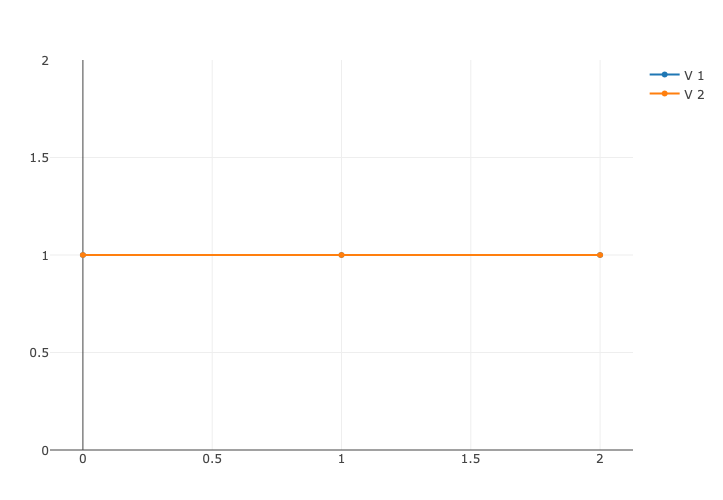

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

([0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0])

([0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0])

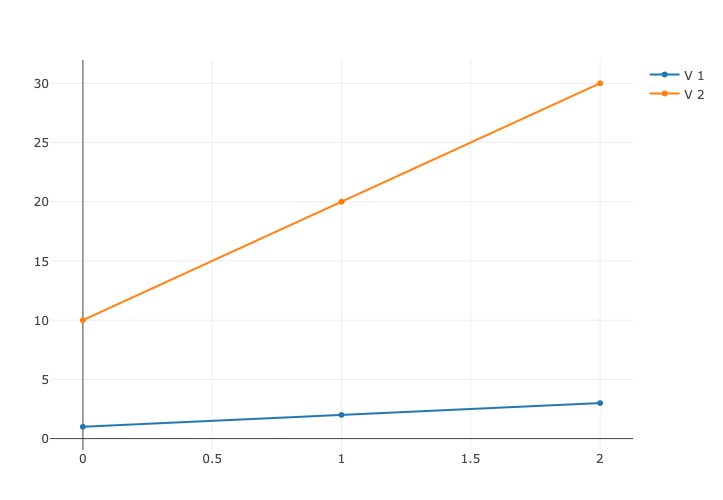

3-element Array{Float64,1}:
 -2.3025850929940455
 -4.605170185988091
 -6.907755278982137

([-1.7047480922384253, -3.4094961844768505, -5.114244276715276], [5.9783700075562045, 11.956740015112409, 17.935110022668614], [-7.68311809979463, -15.36623619958926, -23.04935429938389])

([-2.3025850929940455, -4.605170185988091, -6.907755278982137], [23.02585092994046, 46.05170185988092, 69.07755278982138], [-25.328436022934508, -50.656872045869015, -75.98530806880352])

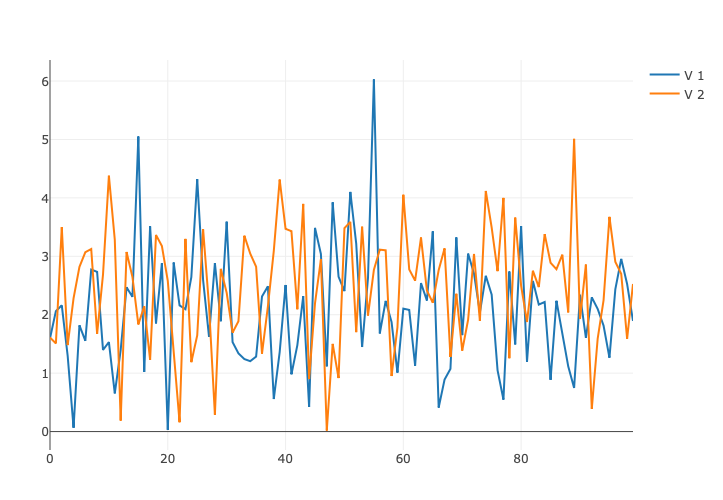

100-element Array{Float64,1}:
 -0.0142627462350693
  0.6440837210791662
 -1.041900316008962
 -0.17197105192924084
 -0.2307063047723276
 -0.7971792061764511
 -1.0582425124707175
 -0.33122031312331174
  1.3430747708238062
 -0.9131820745848206
 -1.6092394593370323
 -1.0549910749868927
  2.793955379287232
  ⋮
 -0.6725939254053189
 -1.4216502663180721
  0.45620423021119166
 -0.925928974742382
  4.07976555809827
  0.5832779062355157
 -0.3884249485913322
 -1.3493709507869078
 -0.4276811738769309
  0.2676573925198689
  1.1706654635596223
 -0.545698722046873

([-0.007147308321589665, 0.2969923349262829, -0.5831475124962864, -0.08883565816136808, -0.18762658463194154, -0.4419234751074622, -0.6175170881254232, -0.17055271187295046, 0.5898809547026389, -0.5299067452533769  …  0.21700972970962787, -0.5287914632936138, 1.2329286702424114, 0.27144665292550757, -0.20458981638476412, -0.8467012227782451, -0.2232102056690601, 0.1307999289057275, 0.518108761177245, -0.29243638388343923], [0.007179321585679575, -0.2539639255224052, 0.7429878260654091, 0.09493138304415309, 1.5181326289387331, 0.5506915822373752, 0.8708199781153633, 0.1810524303732265, -0.4608515906493795, 0.7368278932377285  …  -0.19685227202061045, 0.706864426217601, -0.4819713732883801, -0.23618699050585343, 0.22773415631938188, 1.4609250432790961, 0.243694243538721, -0.12500857720564723, -0.4105173920137658, 0.3378374764435207], [-0.01432662990726924, 0.5509562604486882, -1.3261353385616954, -0.18376704120552118, -1.7057592135706747, -0.9926150573448375, -1.4883370662407864, -0.3516

([-0.0142627462350693, 0.6440837210791662, -1.041900316008962, -0.17197105192924084, -0.2307063047723276, -0.7971792061764511, -1.0582425124707175, -0.33122031312331174, 1.3430747708238062, -0.9131820745848206  …  0.45620423021119166, -0.925928974742382, 4.07976555809827, 0.5832779062355157, -0.3884249485913322, -1.3493709507869078, -0.4276811738769309, 0.2676573925198689, 1.1706654635596223, -0.545698722046873], [0.014390799717684729, -0.4712707854360105, 1.687443095368401, 0.19637183470597322, 8.130107805607851, 1.2357291944455446, 2.0909588388722065, 0.37324415260616683, -0.8217780486870452, 1.7555474424416353  …  -0.37544692304453575, 1.6480595123383561, -0.6907070149046126, -0.4417859077305655, 0.48117912446381567, 3.9217197790831473, 0.5097224366724495, -0.2444840707542157, -0.7364548264795521, 0.7279308897314268], [-0.02865354595275403, 1.1153545065151766, -2.729343411377363, -0.3683428866352141, -8.36081411038018, -2.032908400621996, -3.1492013513429242, -0.7044644657294785, 2.

In [19]:
for (v_1, v_2) in (
    (
        [1,1,1],
        [1,1,1],
    ),
    (
        [1,2,3],
        [10, 20, 30],
    ),
    (
        shift_minimum(randn(100), "0<"),
        shift_minimum(randn(100), "0<"),
    )
)
    
    plot_v_1_v_2(v_1, v_2)

    display(compute_kld(v_1, v_2))
    
    display(compute_jsd(v_1, v_2))
    
    display(compute_zd(v_1, v_2))
    
end